In [180]:
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk import punkt
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

# 1. Lemmatizing, Word Count, Bar Graph

In [181]:
pd = gutenberg.words('milton-paradise.txt')
pd

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [182]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [183]:
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()



stop_words = nltk.corpus.stopwords.words('english')
more_stop_words = ['And', 'The', 'thee', 'thus', 'u', 'wa', 'As']
stop_words.extend(more_stop_words)

word_list = [word for word in pd if word.isalnum()]

lemmatized_list = []

for word in word_list:
    word = lemmatizer.lemmatize(word)
    # word = word.lower()
    if word not in stop_words:
        lemmatized_list.append(word)
    



In [184]:
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
more_stop_words = ['And', 'The', 'thee', 'thus', 'u', 'wa', 'As']


def lemmatize(additional_stop_words):
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words.extend(additional_stop_words)

    word_list = [word for word in pd if word.isalnum()]

    lemmatized_list = []

    for word in word_list:
        word = lemmatizer.lemmatize(word)
        # word = word.lower()
        if word not in stop_words:
            lemmatized_list.append(word)
    
    return lemmatized_list


lemmatize(more_stop_words)

['Paradise',
 'Lost',
 'John',
 'Milton',
 '1667',
 'Book',
 'I',
 'Of',
 'Man',
 'first',
 'disobedience',
 'fruit',
 'Of',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'World',
 'woe',
 'With',
 'loss',
 'Eden',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'regain',
 'blissful',
 'seat',
 'Sing',
 'Heavenly',
 'Muse',
 'secret',
 'top',
 'Of',
 'Oreb',
 'Sinai',
 'didst',
 'inspire',
 'That',
 'shepherd',
 'first',
 'taught',
 'chosen',
 'seed',
 'In',
 'beginning',
 'heaven',
 'earth',
 'Rose',
 'Chaos',
 'Sion',
 'hill',
 'Delight',
 'Siloa',
 'brook',
 'flowed',
 'Fast',
 'oracle',
 'God',
 'I',
 'thence',
 'Invoke',
 'thy',
 'aid',
 'adventurous',
 'song',
 'That',
 'middle',
 'flight',
 'intends',
 'soar',
 'Above',
 'th',
 'Aonian',
 'mount',
 'pursues',
 'Things',
 'unattempted',
 'yet',
 'prose',
 'rhyme',
 'chiefly',
 'thou',
 'O',
 'Spirit',
 'dost',
 'prefer',
 'Before',
 'temple',
 'th',
 'upright',
 'heart',
 'pure',
 'Instruct',
 'th

In [185]:
# lemmatized_list_set = set(lemmatized_list)
# for word in lemmatized_list_set:
#     print(word, lemmatized_list.count(word))

In [186]:
# lemmatized_list_set = set(lemmatized_list)
# dict = {}
# for word in lemmatized_list_set:
#     dict.update({word: lemmatized_list.count(word)})
    
# dict
# lemmatized_dict_in_order = sorted(dict, key=dict.get, reverse=True)
# lemmatized_dict_in_order[:20]

In [187]:
lemmatized_list_count = FreqDist(lemmatized_list)
lemmatized_list_count



FreqDist({'I': 589, 'Of': 564, 'To': 470, 'Heaven': 412, 'thou': 382, 'thy': 339, 'With': 284, 'In': 283, 'God': 258, 'shall': 241, ...})

In [188]:
top_20_words = lemmatized_list_count.most_common(20)
top_20_words



[('I', 589),
 ('Of', 564),
 ('To', 470),
 ('Heaven', 412),
 ('thou', 382),
 ('thy', 339),
 ('With', 284),
 ('In', 283),
 ('God', 258),
 ('shall', 241),
 ('But', 218),
 ('His', 184),
 ('So', 180),
 ('That', 168),
 ('yet', 165),
 ('though', 161),
 ('first', 156),
 ('day', 153),
 ('From', 143),
 ('By', 139)]

The code above displays the top 20 words in addition to their word count. I tried doing it a different way originally, but then I found out about the FreqDist function in nltk and it made this much easier to do. 

In [189]:
# what this does is for the first item in the list, which are the words, it extracts it and puts it into my words list
# does the same with the count, with numbers

words = [word[0] for word in top_20_words]
count = [number[1] for number in top_20_words]

In [190]:
import matplotlib.pyplot as plt
import numpy as np

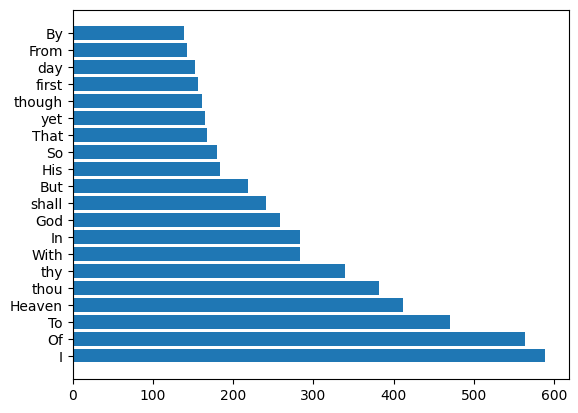

In [191]:
def bargraph(type, x, y):
    plt.barh(x, y)
# this shows the top 20 words in frequency on a bar graph

bargraph('barh', words, count)

I ended up using lemmatization instead of stemming because lemmatization makes words into their root form, so it can be more accurate. It helps to keep the word's context. 

# 2. Vader Sentiment

In [192]:
sentences = gutenberg.sents('milton-paradise.txt')

sentences_str = []

# first_100_sentences = sentences[:100]

# first_100_sentences

# first_100_sentences_str = []

# for sentence in first_100_sentences:
#     x = ' '.join(sentence)
#     first_100_sentences_str.append(x)

for sentence in sentences:
    x = ' '.join(sentence)
    sentences_str.append(x)




In [193]:
# this gets the scores for each of the sentences using vader

for sentence in sentences_str:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print(k, ss[k])
    print()
    

    

[ Paradise Lost by John Milton 1667 ]
compound 0.4404
neg 0.219
neu 0.381
pos 0.4

Book I
compound 0.0
neg 0.0
neu 1.0
pos 0.0

Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .
compound 0.8885
neg 0.117
neu 0.691
pos 0.192

And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; 

In [194]:
# for sentence in sentences_str:
#     sid = SentimentIntensityAnalyzer()
#     print(sentence)
#     ss = sid.polarity_scores(sentence)
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k], end=''))
#     print()
    

    

In [195]:
pos_scores = []

# what this does is, for every sentence, it gets just the positive polarity score, and then adds both the sentence and the score to a list
# I then used sorted to sort it by the second item in the list, which is the score

for sentence in sentences_str:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)['pos']
    x = sentence, ss
    pos_scores.append(x)
    
pos_scores = sorted(pos_scores, key=lambda key: key[1], reverse=True)

pos_scores[:5]
    

[('O friends !', 1.0),
 ('O Heaven !', 1.0),
 ('O Friends !', 1.0),
 ('O Heaven !', 1.0),
 ('She fair , divinely fair , fit love for Gods !', 0.838)]

In [196]:
neg_scores = []

for sentence in sentences_str:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)['neg']
    x = sentence, ss
    neg_scores.append(x)
    
neg_scores = sorted(neg_scores, key=lambda key: key[1], reverse=True)

neg_scores[:5]

[('No !', 1.0),
 ('O Hell !', 1.0),
 ('Alas !', 1.0),
 ('Me miserable !', 0.777),
 ('Sad cure !', 0.772)]

In [197]:
neutral_scores = []

for sentence in sentences_str:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)['neu']
    x = sentence, ss
    neutral_scores.append(x)
    
neutral_scores = sorted(neutral_scores, key=lambda key: key[1], reverse=True)

neutral_scores[:5]

[('Book I', 1.0),
 ('Oh how unlike the place from whence they fell !', 1.0),
 ('But see !', 1.0),
 ('Him , haply slumbering on the Norway foam , The pilot of some small night - foundered skiff , Deeming some island , oft , as seamen tell , With fixed anchor in his scaly rind , Moors by his side under the lee , while night Invests the sea , and wished morn delays .',
  1.0),
 ('Such resting found the sole Of unblest feet .', 1.0)]

# 3. Explanation

The sentiment analysis scores aren't always the best here. This is seen most prominently in the neutral sentences. This is because it gives full scores to some sentences like the title, "Book I". Other than that, it works though. The highest scoring ones in negative are also short, being one or two words, like "No!" or "Oh hell!". The positive scores have a similar issue. It also uses some twice, like "O Friends" and "O friends", with them both getting full 1.0 scores. It also has "O Heaven" twice with no apparent difference between them. 

# Bonus

In [198]:
from wordcloud import WordCloud
import pandas as pd

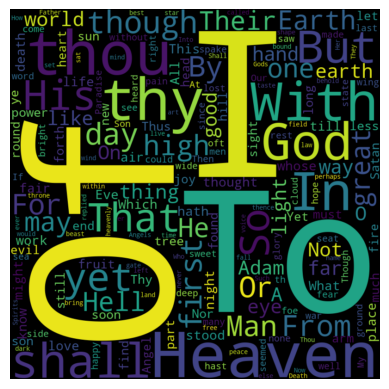

In [199]:
def wordcloud(width, height, list):
    wordcloud = WordCloud(width=width, height=height).generate_from_frequencies(list)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
wordcloud(800,800,lemmatized_list_count)

I was going to attempt doing it in matplotlib, like done in the book, but I wasn't sure where I'd get my second x/y value from, because there he had the word as well as two numbers, where here I just have the word and one. 